In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [102]:
df = pd.read_csv("Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [103]:
df.isnull().sum()              #to check the null values in the data set

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [104]:
df.dropna(inplace = True)        #removes the duplicate values in the data frame

In [105]:
df.duplicated().sum()              #to check the dupliucate values in the data frame

25324

In [106]:
df.drop_duplicates(inplace = True)          #to remove the dupliucate values in the data frame

In [ ]:
#selecting the categorical data
cat_col = df.select_dtypes(include = ["object"])
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [108]:
#feature selection
cat_col = cat_col.drop(["bike_name","city"], axis = 1)
cat_col.head()

,owner,brand
0,First Owner,TVS
1,First Owner,Royal Enfield
2,First Owner,Triumph
3,First Owner,TVS
4,First Owner,Yamaha


In [109]:
num_col = df.select_dtypes(exclude = "object")
num_col.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [110]:
# to change the categorical ---> numerical
## lable encoding
## one hot encoding

In [111]:
# one hot encoding

# pd.get_dummies(cat_col).head()
pd.get_dummies(cat_col).astype(int).head()

,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,brand_Bajaj,brand_Benelli,brand_Ducati,brand_Harley-Davidson,brand_Hero,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [112]:
# lable encoding
cat_col["owner"].value_counts()

owner
First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: count, dtype: int64

In [113]:
dt = {
    "First Owner" : 1,
    "Second Owner" : 2,
    "Third Owner" : 3,
    "Fourth Owner Or More" : 4
}

In [114]:
cat_col["owner"] = cat_col["owner"].map(dt)

In [115]:
cat_col.head(10)

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha
5,1,Yamaha
6,1,Honda
7,1,Hero
8,1,Royal Enfield
9,2,Royal Enfield


In [116]:
cat_col["brand"].value_counts()

brand
Bajaj              2081
Royal Enfield      1346
Hero               1142
Honda               676
Yamaha              651
TVS                 481
KTM                 375
Suzuki              203
Harley-Davidson      91
Kawasaki             61
Hyosung              53
Mahindra             50
Benelli              46
Triumph              21
Ducati               20
BMW                  10
Jawa                  7
Indian                3
MV                    3
Rajdoot               1
LML                   1
Yezdi                 1
Ideal                 1
Name: count, dtype: int64

In [117]:
dt1 = {i : key for key, i in enumerate(list(cat_col["brand"].unique()))}

In [118]:
cat_col["brand"] = cat_col["brand"].map(dt1)

In [119]:
cat_col.head()

,owner,brand
0,1,0
1,1,1
2,1,2
3,1,0
4,1,3


In [120]:
final_df = pd.concat([cat_col, num_col], axis = 1)
final_df.head()

,owner,brand,price,kms_driven,age,power
0,1,0,35000.0,17654.0,3.0,110.0
1,1,1,119900.0,11000.0,4.0,350.0
2,1,2,600000.0,110.0,8.0,675.0
3,1,0,65000.0,16329.0,4.0,180.0
4,1,3,80000.0,10000.0,3.0,150.0


In [121]:
matrix = final_df.corr()
matrix

,owner,brand,price,kms_driven,age,power
owner,1.000000,0.005844,-0.005188,0.062612,0.203151,0.043746
brand,0.005844,1.000000,0.288409,-0.036161,-0.030263,0.068647
price,-0.005188,0.288409,1.000000,-0.199951,-0.248752,0.807641
kms_driven,0.062612,-0.036161,-0.199951,1.000000,0.367518,-0.168295
age,0.203151,-0.030263,-0.248752,0.367518,1.000000,-0.164211
power,0.043746,0.068647,0.807641,-0.168295,-0.164211,1.000000


<Axes: >

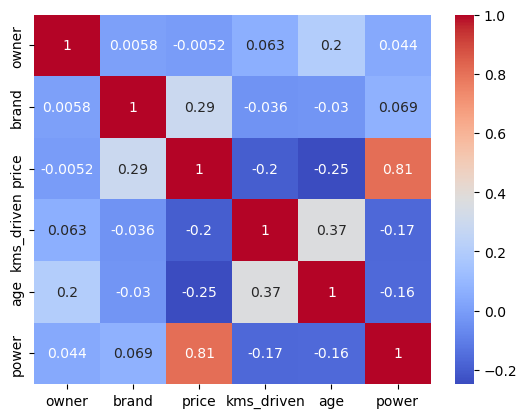

In [122]:
sns.heatmap(matrix, annot = True, cmap = "coolwarm")

In [123]:
# dividing the data into dependent and independent variables

x = final_df.drop("price", axis = 1)
y = final_df["price"]

In [124]:
# dividing the data into training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [125]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [126]:
lr.score(x_train, y_train)

0.7053826605671762

In [127]:
lr.score(x_test, y_test)

0.7586900869385861

In [128]:
# Make predictions on test data
y_pred = lr.predict(x_test)
y_pred

array([125382.54523531, 216422.20333609,  96966.48595238, ...,
        72233.83615101, 208856.6762068 ,   9305.60087561])

In [129]:
# Making a DataFrame
df1 = pd.DataFrame({"Actual" : y_test, "Predected" : y_pred})
df1

,Actual,Predected
4909,88400.0,125382.545235
1942,102850.0,216422.203336
5763,67000.0,96966.485952
4800,30000.0,7571.713344
7614,20000.0,8532.577046
...,...,...
5653,395000.0,476134.279312
609,140000.0,175120.608085
4211,54500.0,72233.836151
6379,114000.0,208856.676207


In [130]:
# Print model parameters
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: -53108.42414713511
Coefficient: [-7.78203227e+03  9.06328530e+03 -8.75396521e-02 -3.51646794e+03
  5.72223332e+02]


In [131]:
# Evaluate the model

from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 34658.309865611365
Mean Squared Error: 4697994405.450722
Root Mean Squared Error: 68541.91714163474


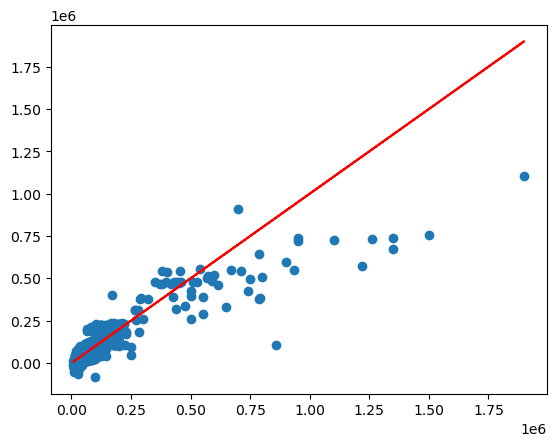

In [132]:
# Visualize results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
# plt.show()